
# Lab | Random Forests

## Instructions

- Apply the Random Forests algorithm AFTER upscaling the data to deal with the imbalance.
- Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)
- Re-run the Random Forest algorithm to determine if the Feature Selection has improved the results.
- Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

## Load libraries

In [1]:
import pandas as pd
import numpy as np

## Read datasets

In [2]:
data = pd.read_csv('trainset_oversampled.csv')
X_test = pd.read_csv('X_test_transformed.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
pd.set_option('display.max_columns', None)
data

,INCOME,WEALTH1,WEALTH2,MHUC2,HPHONE_D,RFA_2F,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,4,6,6,2,0,4,3,2,86,1,23,5,95,8,94,12,96,3,86,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,4,4,5,2,1,2,3,2,86,1,19,1,92,7,93,9,95,8,86,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,4,9,5,4,1,4,2,2,86,1,19,8,90,12,94,4,97,2,86,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,5,9,7,3,0,2,2,2,92,1,46,3,92,1,94,9,95,12,92,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,6,9,9,3,1,2,3,1,88,1,42,1,88,1,95,6,95,11,88,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144957,6,9,9,4,0,1,2,2,86,1,50,3,88,6,95,12,95,12,86,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
144958,6,9,9,5,0,1,3,1,90,1,25,1,95,4,96,3,96,3,90,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
144959,2,4,4,2,1,2,1,2,89,1,19,2,92,9,96,2,96,2,89,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
144960,2,0,0,2,1,1,3,3,91,1,25,6,96,3,95,5,96,12,91,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0


In [4]:
data.isna().sum().sum()

0

## X-y split

In [5]:
X_train = data.drop(['TARGET_B'], axis=1)
y_train = data['TARGET_B']

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8) # fraction of X-train to use in each tree
                             

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6001779776769084
0.6055651627102657


TARGET_B
0           18088
1             995
Name: count, dtype: int64

array([[11026,  7062],
       [  465,   530]], dtype=int64)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

pred = clf.predict(X_test)
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.06981032665964172
recall:  0.5326633165829145
f1:  0.12344241294980784


In [ ]:
# total cost
465*15+7062*.68

The model is predicting a lot of  people that are not donors as donors, but the error that cost more is not predict a donor when in fact it is a donor.

 I will apply PCA and optimize hiperparameters to improve even more

### Scale and apply PCA to maximize return

#### Scale

In [9]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different

MinMaxtransformer = MinMaxScaler().fit(X_train)
X_train_scaled = MinMaxtransformer.transform(X_train)
X_test_scaled = MinMaxtransformer.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,INCOME,WEALTH1,WEALTH2,MHUC2,HPHONE_D,RFA_2F,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.500000,0.666667,0.666667,0.4,0.0,1.000000,1.0,0.333333,0.214286,0.0,0.237113,0.363636,0.90,0.636364,0.863636,1.000000,0.5,0.181818,0.895833,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.500000,0.444444,0.555556,0.4,1.0,0.333333,1.0,0.333333,0.214286,0.0,0.195876,0.000000,0.75,0.545455,0.818182,0.727273,0.0,0.636364,0.895833,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.500000,1.000000,0.555556,0.8,1.0,1.000000,0.5,0.333333,0.214286,0.0,0.195876,0.636364,0.65,1.000000,0.863636,0.272727,1.0,0.090909,0.895833,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,1.000000,0.777778,0.6,0.0,0.333333,0.5,0.333333,0.642857,0.0,0.474227,0.181818,0.75,0.000000,0.863636,0.727273,0.0,1.000000,0.958333,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.833333,1.000000,1.000000,0.6,1.0,0.333333,1.0,0.000000,0.357143,0.0,0.432990,0.000000,0.55,0.000000,0.909091,0.454545,0.0,0.909091,0.916667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

#### - Explained Variance Ratio

In [12]:
pca.explained_variance_ratio_

array([9.06397184e-02, 7.86522243e-02, 6.73421839e-02, 6.05875538e-02,
       5.88077069e-02, 5.39188597e-02, 4.94030651e-02, 4.57404214e-02,
       4.23094452e-02, 3.98151622e-02, 3.83785778e-02, 3.32886576e-02,
       3.13290122e-02, 3.01445731e-02, 2.66235781e-02, 2.11558164e-02,
       1.92864845e-02, 1.78976927e-02, 1.60060193e-02, 1.53526993e-02,
       1.37118021e-02, 1.35682494e-02, 1.28545541e-02, 1.14373911e-02,
       1.05349877e-02, 9.74065582e-03, 9.38566896e-03, 8.55675470e-03,
       8.15904393e-03, 7.99556400e-03, 7.77983754e-03, 7.62882361e-03,
       6.50640552e-03, 6.32575222e-03, 6.09100810e-03, 5.05045611e-03,
       4.68925034e-03, 4.60382391e-03, 4.07144773e-03, 2.02046645e-03,
       1.52247922e-03, 9.21524130e-04, 1.57718918e-04, 6.88252986e-06])

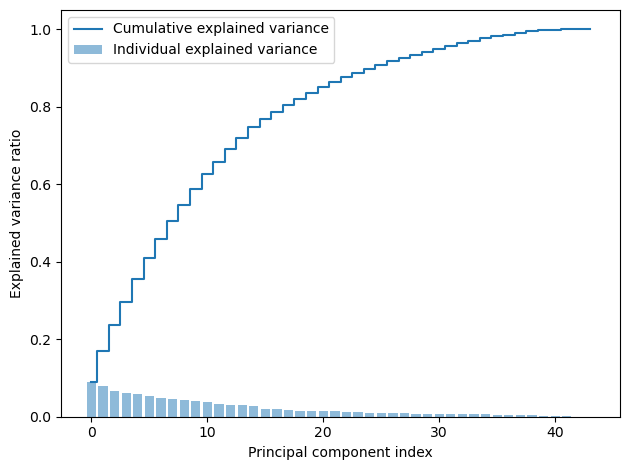

In [13]:
import matplotlib.pyplot as plt
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of explained variance; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_variance = np.cumsum(exp_var_pca)
cum_sum_variance

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_variance)), cum_sum_variance, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### - Apply PCA on train and test data

In [14]:
pca = PCA(15)
pca.fit(X_train_scaled)

PCA(n_components=15)

In [15]:
pca.explained_variance_ratio_

array([0.09063972, 0.07865222, 0.06734218, 0.06058755, 0.0588077 ,
       0.05391886, 0.04940304, 0.04574041, 0.0423094 , 0.03981474,
       0.03837845, 0.03328823, 0.03132801, 0.03014433, 0.02662246])

In [16]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [17]:
pd.DataFrame(X_test_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.519778,-0.215389,-0.732539,-0.308393,0.059657,-0.513754,-0.161458,-0.112456,0.486625,0.553677,0.489145,-0.091664,0.001897,0.409318,-0.486238
1,1.137838,-0.338305,0.523454,-0.109782,-0.618733,-1.133182,0.541815,-0.335649,-0.191592,-0.153121,-0.532784,-0.013526,0.664244,0.185755,0.541451
2,-0.262898,0.465638,1.389967,0.125121,0.449156,0.147102,0.436716,-0.208573,0.662728,0.166818,-0.075884,-0.213615,-0.121677,0.226220,-0.098530
3,-0.143999,-0.368569,-0.819972,-0.772324,0.298512,-0.147642,0.302708,0.836775,-0.052882,-0.085664,-0.320436,0.022738,-0.296401,-0.318688,-0.184741
4,-0.984569,-0.098403,-0.050567,0.097200,1.269514,-0.028043,-0.275970,-0.058423,-0.393751,0.130478,0.465150,0.066528,0.354331,0.340998,0.181709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,-0.923766,-0.305153,0.754909,-0.966748,0.221700,0.203655,-0.610002,-0.357560,0.071285,-0.164420,-0.233440,-0.187048,0.389669,0.107309,0.095467
19079,-0.553228,0.086086,0.441433,0.673330,-0.767227,-0.652122,0.366544,-0.013653,-0.126150,-0.332821,-0.105704,-0.406208,-0.158813,-0.317340,0.247559
19080,-0.326255,-0.978150,0.532754,-0.561753,0.048410,0.716525,-0.326444,0.652318,0.132840,-0.223737,-0.547929,-0.195057,0.335797,0.083360,-0.232040
19081,0.562439,-0.425917,-0.828204,-0.339338,-0.025742,-0.660671,-0.071391,-0.290247,0.414800,-0.426517,0.309012,0.472202,-0.063775,0.751356,-0.412372


## Applying RandomizedSearchCV

In [18]:
# from sklearn.model_selection import RandomizedSearchCV

# random_grid = {'max_depth': [3,4,5,6,7,8,9,10,None],
#                'criterion': ["gini", "entropy", "log_loss"],
#                'min_samples_split': [2,3,4,5,6,7,8,9,10],
#                'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
#                'max_features': [3,4,5,6,None]}

In [19]:
# # and now apply it
# model = RandomForestClassifier()
# random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=100, cv = 5, scoring='recall', n_jobs=-1)

In [20]:
# I wasn't able to run this cell as it took more than an hour
# # fit on the training data
# random_search.fit(X_train_pca, y_train)

In [21]:
# # import pickle
# forest_best_params = random_search.best_params_
# with open('forest_best_params.p', 'wb') as file:
#     pickle.dump(forest_best_params, file)

In [22]:
# random_search.best_score_

In [23]:
# forest_best_params = pd.read_pickle('forest_best_params.p')
# forest_best_params

### Modelling with Random Forest optimal hiperparameters

In [26]:
# I am aware that I should have made the parameter optimization with the pca data. But as it takes 30 min to run I will leave it like that in this case.

clf_op = RandomForestClassifier(max_depth=3, # max number of questions to ask
                             min_samples_split=5, # amount of rows still considered at every question
                             min_samples_leaf =2, # ultimate answer based on at least this many rows
                             max_features = 3,
                             n_jobs=-1) 

clf_op.fit(X_train_pca, y_train)
print(clf_op.score(X_train_pca, y_train))
print(clf_op.score(X_test_pca, y_test))

y_pred = clf_op.predict(X_test_pca)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.5805452463404203
0.621652779961222


TARGET_B
0           18088
1             995
Name: count, dtype: int64

array([[11386,  6702],
       [  518,   477]], dtype=int64)

In [27]:
# total cost
518*15+6702*.68

12327.36

This model does worse than the one before as the cost is more

#### Conclusion:
 
 - The Random Forest model I built first made the least errors prediction non donor when in fact was a donor (this is the worse error as it costs 15 dollars each error) and the total cost is less, so I will keep that one